In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Importing dataset 

In [334]:
df=pd.read_csv('/Churn_Modelling.csv')

In [335]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [336]:
df.shape

(10000, 14)

In [337]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Preprocessing

In [339]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [340]:
#Checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Checking for constant columns 

In [341]:
print(df.eq(df.iloc[0]).all())

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool


#### Checking for unique value counts 

In [342]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

We can drop 'RowNumber' and 'CustomerId' because a unique value is assigned to every new customer.
It also goes at par with 'Surname' because it would lead to profiling so we can drop this as well

In [343]:
#Dropping 'RowNumber','CustomerId' and 'Surname'
df=df.drop(['RowNumber'],axis=1)
df=df.drop(['CustomerId'],axis=1)
df=df.drop(['Surname'],axis=1)

In [344]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [345]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [346]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

Since every customer has a unique estimated salary we can divide them into aging buckets and group the data properly

In [347]:
bins=[0,50000,100000,150000,200000]
labels=['0-50,000','50,000-100,000','100,000-150,000','150,000-200,000']
df['EstimatedSalary_group']=pd.cut(df['EstimatedSalary'],bins=bins,labels=labels,right=False)

Since there are many unique values in balance ,we can divide them into aginig buckets and group the data properly

In [348]:
bins=[0,50000,100000,150000,260000]
labels=['0-50,000','50,000-100,000','100,000-150,000','150,000+']
df['Balance_group']=pd.cut(df['Balance'],bins=bins,labels=labels,right=False)

In [349]:
#dropping 'EstimatedSalary' and 'Balance'
df.drop('EstimatedSalary',axis=1,inplace=True)
df.drop('Balance',axis=1,inplace=True)

In [350]:
df['EstimatedSalary_group'].value_counts()

100,000-150,000    2555
50,000-100,000     2537
150,000-200,000    2455
0-50,000           2453
Name: EstimatedSalary_group, dtype: int64

In [351]:
df['Balance_group'].value_counts()

100,000-150,000    3830
0-50,000           3692
50,000-100,000     1509
150,000+            969
Name: Balance_group, dtype: int64

#### Dropping duplicate and null rows

In [352]:
df.drop_duplicates(keep='first',inplace=True)
df.dropna(how='all',inplace=True)

In [353]:
df.shape

(9999, 11)

Therefore no duplicate or null rows present

### Dropping columns with 90 percent identical values

In [354]:
for x in df.columns:
    value=df[x].value_counts(normalize=True)*100
    print(x,'has',max(value),'percent same values')
    if max(value) >=90:
        df.drop([x],inplace=True,axis=1)
        print('dropped')
    print('\n')

CreditScore has 2.33023302330233 percent same values


Geography has 50.13501350135014 percent same values


Gender has 54.56545654565457 percent same values


Age has 4.780478047804781 percent same values


Tenure has 10.481048104810482 percent same values


NumOfProducts has 50.845084508450846 percent same values


HasCrCard has 70.55705570557056 percent same values


IsActiveMember has 51.515151515151516 percent same values


Exited has 79.62796279627963 percent same values


EstimatedSalary_group has 25.552555255525554 percent same values


Balance_group has 38.3038303830383 percent same values




Therefore no columns with 90 percent identical values

#### Outlier removal

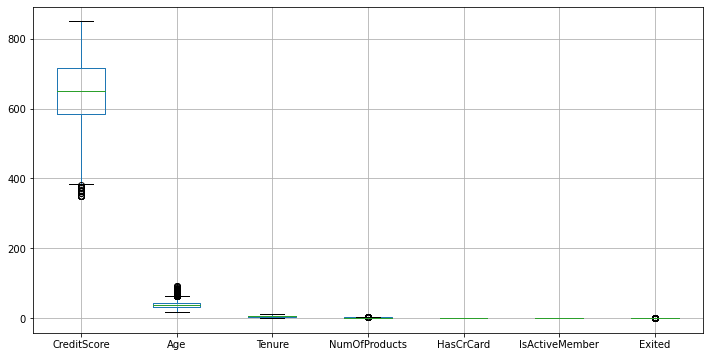

In [355]:
plt.figure(figsize=(12,6))
df.boxplot()
plt.show()

Removing outliers of 'CreditScore' and 'Age'

In [356]:
#For 'CreditScore'
lowerlimit=df['CreditScore'].quantile(0.002)
upperlimit=df['CreditScore'].quantile(0.998)
print(lowerlimit)
print(upperlimit)

403.988
850.0


In [357]:
df=df[(df['CreditScore'] < upperlimit) & (df['CreditScore'] > lowerlimit)]

In [358]:
df.shape

(9746, 11)

In [359]:
#For 'Age'
lowerlimit=df['Age'].quantile(0.01)
upperlimit=df['Age'].quantile(0.99)
print(lowerlimit)
print(upperlimit)

21.0
72.0


In [360]:
df=df[(df['Age'] < upperlimit) & (df['Age'] > lowerlimit)]

In [361]:
df.shape

(9502, 11)

Since there are many unique values in CreditScore ,we can divide them into aginig buckets and group the data properly

In [362]:
bins=[400,600,700,1200]
labels=['400-600','600-700','700+']
df['CreditScore_group']=pd.cut(df['CreditScore'],bins=bins,labels=labels,right=False)

In [363]:
#dropping 'CreditScore'
df.drop('CreditScore',axis=1,inplace=True)

In [364]:
df['CreditScore_group'].value_counts()

600-700    3709
400-600    2958
700+       2835
Name: CreditScore_group, dtype: int64

# Exploratory Data Analysis

#### Univariate Analysis

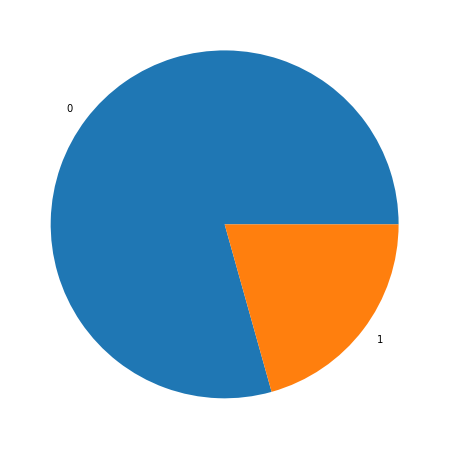

In [365]:
#Piechart for target column 'Exited'
flag=df['Exited'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(flag.values,labels=flag.index)
plt.show()

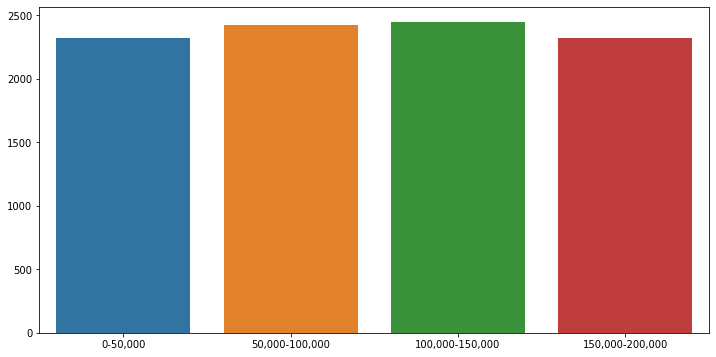

In [366]:
#Barplot distribution for column 'EstimatedSalary_group'
flag=df['EstimatedSalary_group'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(flag.index,flag.values)

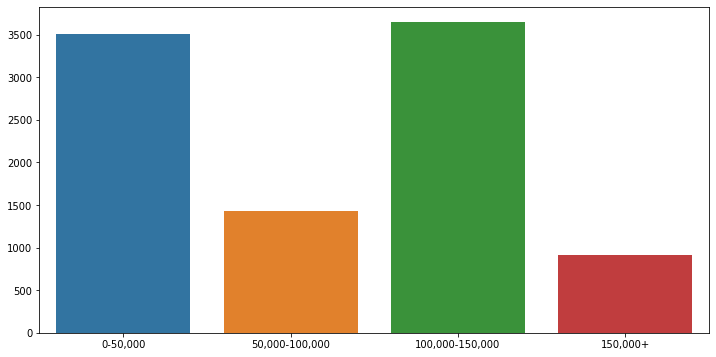

In [367]:
#Barplot distribution for column 'Balance_group'
flag=df['Balance_group'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(flag.index,flag.values)

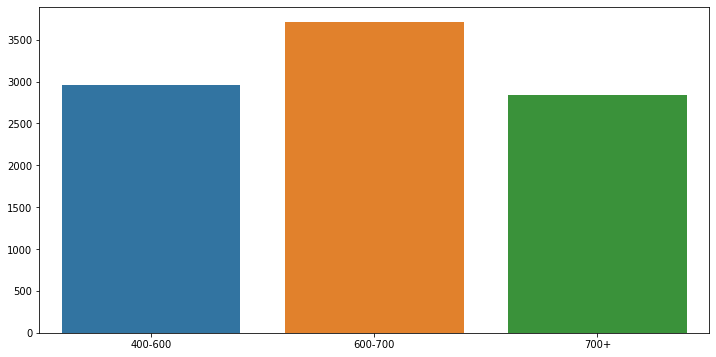

In [368]:
#Barplot distribution for column 'CreditScore_group'
flag=df['CreditScore_group'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(flag.index,flag.values)

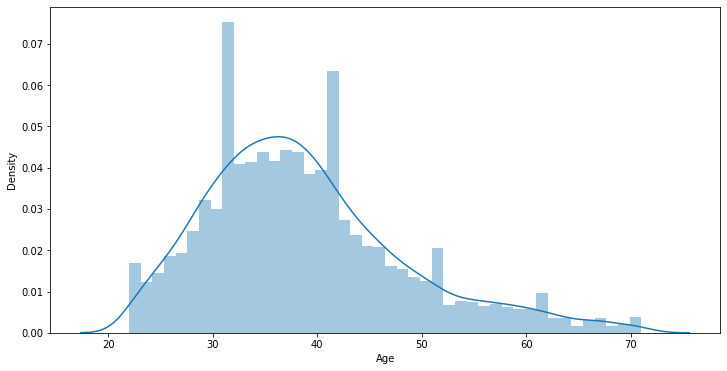

In [369]:
#Distplot for 'Age'
plt.figure(figsize=(12,6))
sns.distplot(df['Age'])

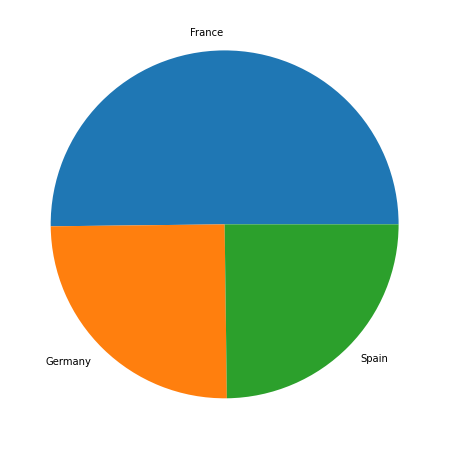

In [370]:
#Piechart for target column 'Geography'
flag=df['Geography'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(flag.values,labels=flag.index)
plt.show()

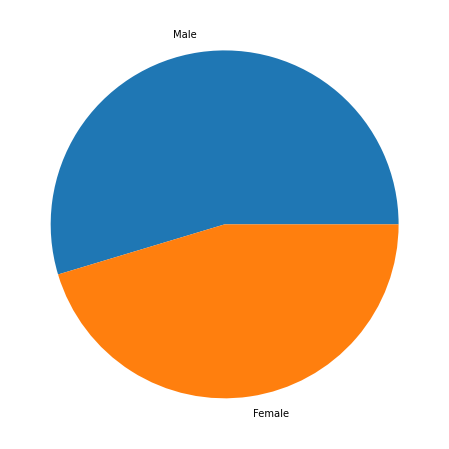

In [371]:
#Piechart for target column 'Gender'
flag=df['Gender'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(flag.values,labels=flag.index)
plt.show()

#### Bivariate Analysis

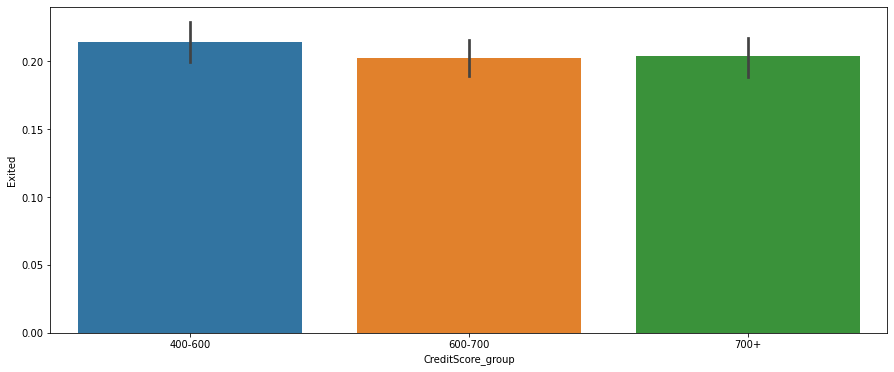

In [372]:
#Barplot distribution for column 'CreditScore_group' against target column 'Exited'
plt.figure(figsize=(15,6))
sns.barplot(df['CreditScore_group'],df['Exited'])

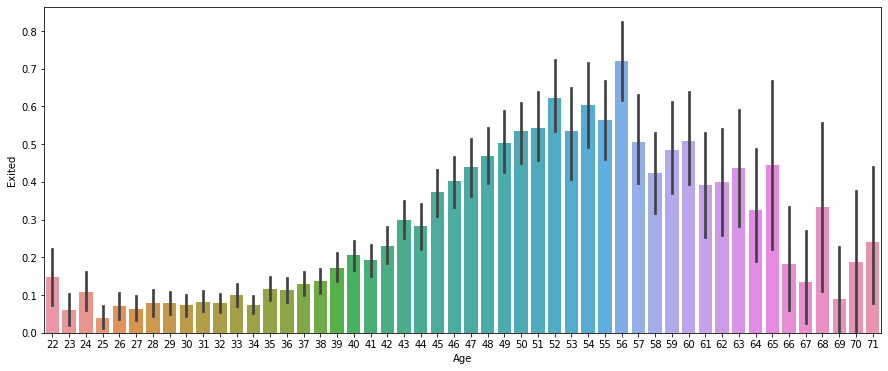

In [373]:
#Barplot distribution for column 'Age' against target column 'Exited'
plt.figure(figsize=(15,6))
sns.barplot(df['Age'],df['Exited'])

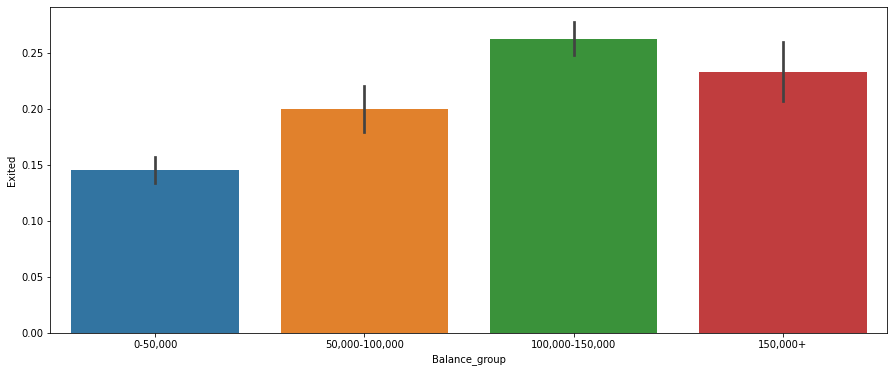

In [374]:
#Barplot distribution for column 'Balance_group' against target column 'Exited'
plt.figure(figsize=(15,6))
sns.barplot(df['Balance_group'],df['Exited'])
plt.show()

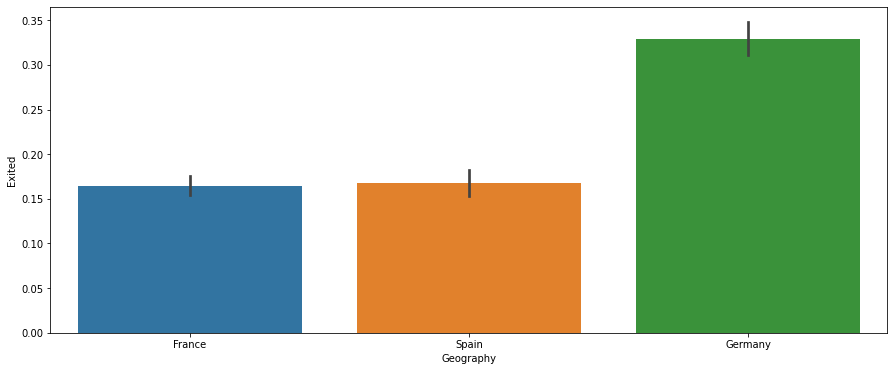

In [375]:
#Barplot distribution for column 'Geography' against target column 'Exited'
plt.figure(figsize=(15,6))
sns.barplot(df['Geography'],df['Exited'])
plt.show()

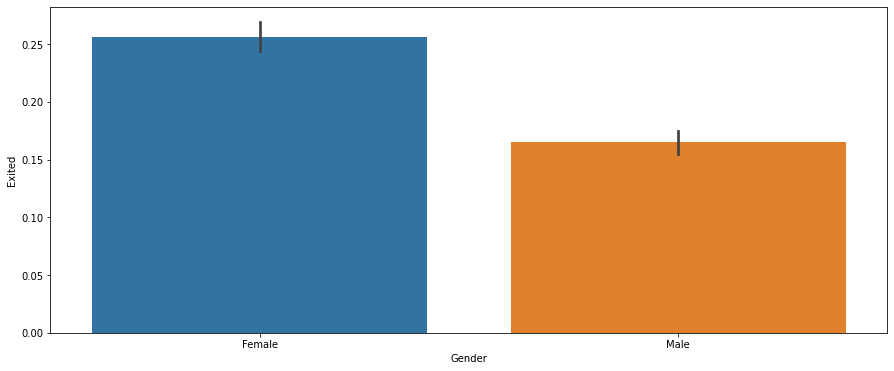

In [376]:
#Barplot distribution for column 'Gender' against target column 'Exited'
plt.figure(figsize=(15,6))
sns.barplot(df['Gender'],df['Exited'])
plt.show()

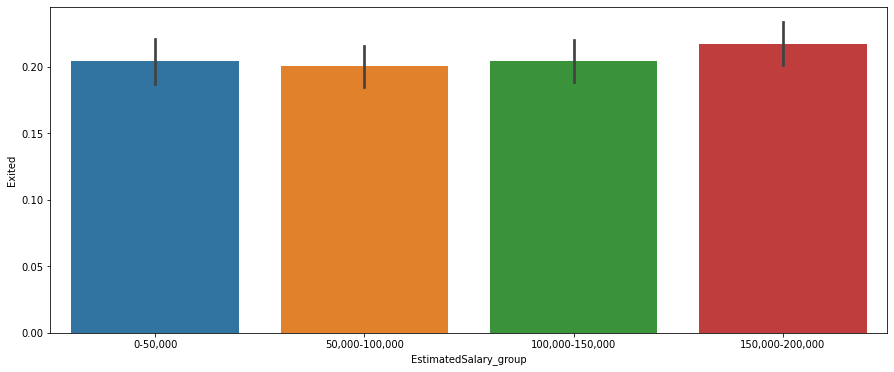

In [377]:
#Barplot distribution for column 'EstimatedSalary_group' against target column 'Exited'
plt.figure(figsize=(15,6))
sns.barplot(df['EstimatedSalary_group'],df['Exited'])
plt.show()

#### Multivariate Analysis

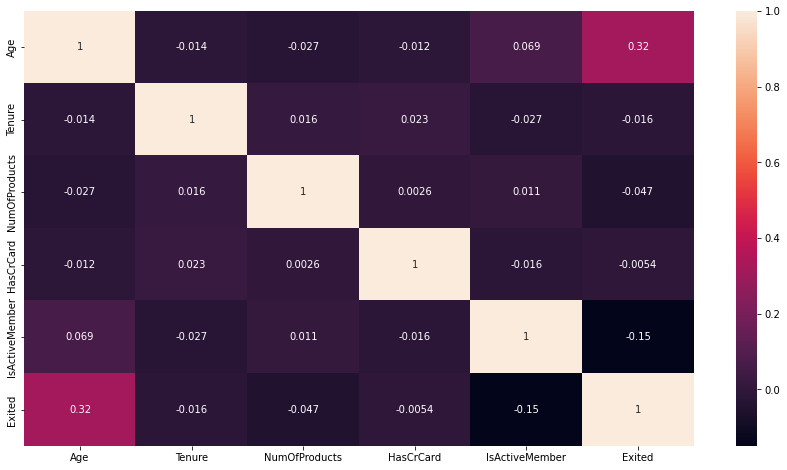

In [378]:
#Creating a heatmap of correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

# Data Splitting

#### Splitting into X and Y 

In [379]:
X=df.drop("Exited",axis=1)
Y=df["Exited"]

#### Splitting into train, validation and test

In [380]:
from sklearn.model_selection import train_test_split
x_train1,x_Mtest,y_train1,y_Mtest= train_test_split(X,Y,test_size=0.3,random_state=42)

In [381]:
x_val,x_test,y_val,y_test= train_test_split(x_Mtest,y_Mtest,test_size=0.5,random_state=42)

In [382]:
x_train1.shape

(6651, 10)

In [383]:
x_val.shape

(1425, 10)

In [384]:
x_test.shape

(1426, 10)

In [385]:
y_train1.shape

(6651,)

In [386]:
y_val.shape

(1425,)

In [387]:
y_test.shape

(1426,)

# Feature Engineering

In [388]:
x_train1.shape

(6651, 10)

In [389]:
x_train1.describe()

,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember
count,6651.000000,6651.000000,6651.000000,6651.000000,6651.000000
mean,38.898662,5.043302,1.526086,0.704856,0.510901
std,9.634569,2.883490,0.576771,0.456142,0.499919
min,22.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,3.000000,1.000000,0.000000,0.000000
50%,37.000000,5.000000,1.000000,1.000000,1.000000
75%,44.000000,7.000000,2.000000,1.000000,1.000000
max,71.000000,10.000000,4.000000,1.000000,1.000000


#### Encoding

In [390]:
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()

In [391]:
x_train1.head()

,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary_group,Balance_group,CreditScore_group
9603,France,Male,39,7,2,0,1,"0-50,000","0-50,000",600-700
2251,Spain,Female,25,8,1,1,0,"0-50,000","100,000-150,000",600-700
6979,France,Female,40,7,1,1,0,"150,000-200,000","50,000-100,000",400-600
6017,France,Female,34,2,1,0,0,"0-50,000","50,000-100,000",400-600
2704,France,Male,27,2,2,0,0,"0-50,000","0-50,000",700+


Using Label encoding on 'EstimatedSalary_group','Balance_group','CreditScore_group','Geography' and 'Gender'

In [392]:
#for 'EstimatedSalary_group'
lenc.fit(x_train1['EstimatedSalary_group'])
x_train1['EstimatedSalary_group_enc']=lenc.transform(x_train1['EstimatedSalary_group'])
x_val['EstimatedSalary_group_enc']=lenc.fit_transform(x_val['EstimatedSalary_group'])
x_test['EstimatedSalary_group_enc']=lenc.fit_transform(x_test['EstimatedSalary_group'])

In [393]:
#Dropping encoded column 'EstimatedSalary_group'
x_train1.drop('EstimatedSalary_group',axis=1,inplace=True)
x_val.drop('EstimatedSalary_group',axis=1,inplace=True)
x_test.drop('EstimatedSalary_group',axis=1,inplace=True)

In [394]:
#for 'Balance_group'
lenc.fit(x_train1['Balance_group'])
x_train1['Balance_group_enc']=lenc.transform(x_train1['Balance_group'])
x_val['Balance_group_enc']=lenc.fit_transform(x_val['Balance_group'])
x_test['Balance_group_enc']=lenc.fit_transform(x_test['Balance_group'])

In [395]:
#Dropping encoded column 'Balance_group'
x_train1.drop('Balance_group',axis=1,inplace=True)
x_val.drop('Balance_group',axis=1,inplace=True)
x_test.drop('Balance_group',axis=1,inplace=True)

In [396]:
#for 'CreditScore_group'
lenc.fit(x_train1['CreditScore_group'])
x_train1['CreditScore_group_enc']=lenc.transform(x_train1['CreditScore_group'])
x_val['CreditScore_group_enc']=lenc.fit_transform(x_val['CreditScore_group'])
x_test['CreditScore_group_enc']=lenc.fit_transform(x_test['CreditScore_group'])

In [397]:
#Dropping encoded column 'CreditScore_group'
x_train1.drop('CreditScore_group',axis=1,inplace=True)
x_val.drop('CreditScore_group',axis=1,inplace=True)
x_test.drop('CreditScore_group',axis=1,inplace=True)

In [398]:
#for 'Geography'
lenc.fit(x_train1['Geography'])
x_train1['Geography_enc']=lenc.transform(x_train1['Geography'])
x_val['Geography_enc']=lenc.fit_transform(x_val['Geography'])
x_test['Geography_enc']=lenc.fit_transform(x_test['Geography'])

In [399]:
#Dropping encoded column 'Geography'
x_train1.drop('Geography',axis=1,inplace=True)
x_val.drop('Geography',axis=1,inplace=True)
x_test.drop('Geography',axis=1,inplace=True)

In [400]:
#for 'Gender'
lenc.fit(x_train1['Gender'])
x_train1['Gender_enc']=lenc.transform(x_train1['Gender'])
x_val['Gender_enc']=lenc.fit_transform(x_val['Gender'])
x_test['Gender_enc']=lenc.fit_transform(x_test['Gender'])

In [401]:
#Dropping encoded column 'Gender'
x_train1.drop('Gender',axis=1,inplace=True)
x_val.drop('Gender',axis=1,inplace=True)
x_test.drop('Gender',axis=1,inplace=True)

Creating a heatmap of correlation matrix

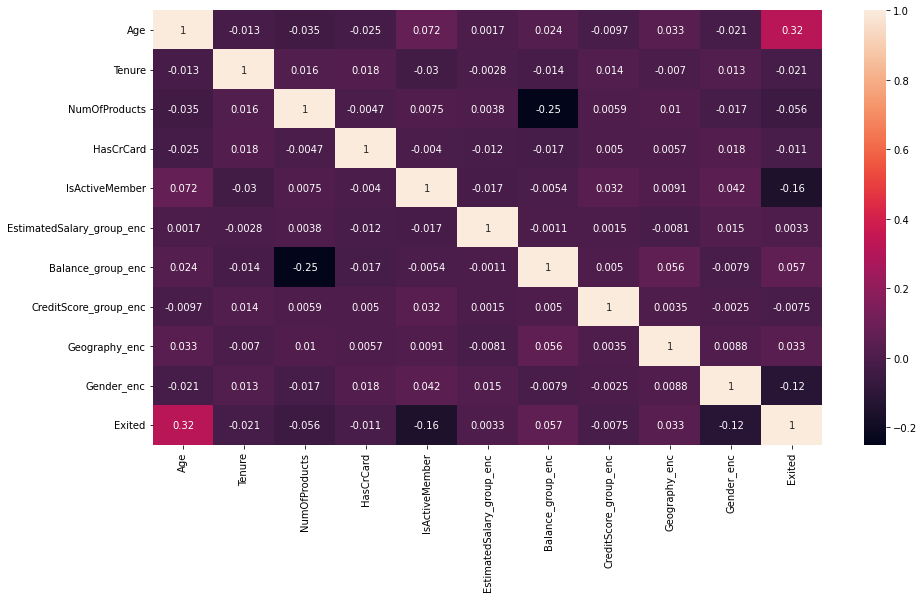

In [402]:
plt.figure(figsize=(15,8))
temp=pd.concat([x_train1,y_train1],axis=1,join='inner')
sns.heatmap(temp.corr(),annot=True)

Deleting 'EstimatedSalary_group_enc' and 'HasCrCard' because of very low correlation

In [403]:
x_train1.drop('EstimatedSalary_group_enc',axis=1,inplace=True)
x_val.drop('EstimatedSalary_group_enc',axis=1,inplace=True)
x_test.drop('EstimatedSalary_group_enc',axis=1,inplace=True)

In [404]:
x_train1.drop('HasCrCard',axis=1,inplace=True)
x_val.drop('HasCrCard',axis=1,inplace=True)
x_test.drop('HasCrCard',axis=1,inplace=True)

In [405]:
x_train1.head()

,Age,Tenure,NumOfProducts,IsActiveMember,Balance_group_enc,CreditScore_group_enc,Geography_enc,Gender_enc
9603,39,7,2,1,0,1,0,1
2251,25,8,1,0,1,1,2,0
6979,40,7,1,0,3,0,0,0
6017,34,2,1,0,3,0,0,0
2704,27,2,2,0,0,2,0,1


#### Data Oversampling

Since the target column 'Exited' is imbalanced, we need to perform oversampling

In [407]:
#from imblearn.over_sampling import SMOTE
#smote=SMOTE()

In [408]:
#x_train,y_train=smote.fit_resample(x_train1,y_train1)

In [409]:
#y_train1.shape

(6651,)

In [410]:
#y_train.shape

(10558,)

In [411]:
#y_train.value_counts()

0    5279
1    5279
Name: Exited, dtype: int64

# Feature Scaling

In [236]:
#Scaling the data using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.fit_transform(x_val)
x_test=scaler.fit_transform(x_test)

In [237]:
x_train

array([[0.26530612, 0.1       , 0.        , ..., 0.        , 0.5       ,
        0.        ],
       [0.36734694, 0.6       , 0.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.24489796, 0.1       , 0.        , ..., 0.        , 0.5       ,
        0.        ],
       ...,
       [0.57142857, 0.5       , 0.        , ..., 0.        , 0.5       ,
        0.        ],
       [1.        , 0.8       , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.28571429, 0.2       , 0.33333333, ..., 0.        , 0.        ,
        0.        ]])

# Model Implementation

In [412]:
Algo=[]
accuracy=[]
precision=[]
recall=[]
f1score=[]

#### Logistic Regression

In [413]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(x_train,y_train)
pred=logr.predict(x_val)
accuracy.append(metrics.accuracy_score(y_val,pred))
precision.append(metrics.precision_score(y_val,pred))
recall.append(metrics.recall_score(y_val,pred))
f1score.append(metrics.f1_score(y_val,pred))
Algo.append('Logistic Regression')

#### KNN Classifier

In [414]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_val)
accuracy.append(metrics.accuracy_score(y_val,pred))
precision.append(metrics.precision_score(y_val,pred))
recall.append(metrics.recall_score(y_val,pred))
f1score.append(metrics.f1_score(y_val,pred))
Algo.append('KNN Classifier')

#### Decision Tree Classifier

In [415]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_val)
accuracy.append(metrics.accuracy_score(y_val,pred))
precision.append(metrics.precision_score(y_val,pred))
recall.append(metrics.recall_score(y_val,pred))
f1score.append(metrics.f1_score(y_val,pred))
recall.append(metrics.recall_score(y_val,pred))
f1score.append(metrics.f1_score(y_val,pred))
Algo.append('Decision Tree Classifier')

#### Random Forest Classifier

In [416]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_val)
accuracy.append(metrics.accuracy_score(y_val,pred))
precision.append(metrics.precision_score(y_val,pred))
recall.append(metrics.recall_score(y_val,pred))
f1score.append(metrics.f1_score(y_val,pred))
Algo.append('Random Forest Classifier')

#### XGB Classifier

In [417]:
from xgboost import XGBClassifier
xgbr=XGBClassifier()
xgbr.fit(x_train,y_train)
pred=xgbr.predict(x_val)
accuracy.append(metrics.accuracy_score(y_val,pred))
precision.append(metrics.precision_score(y_val,pred))
recall.append(metrics.recall_score(y_val,pred))
f1score.append(metrics.f1_score(y_val,pred))
Algo.append(' XGB Classifier')

#### Classification Report

In [418]:
classrep=pd.DataFrame(list(zip(Algo,precision,recall,f1score,accuracy)),columns=['Algorithm used','precision score','recall value','f1 score','accuracy score'])

In [419]:
classrep

,Algorithm used,precision score,recall value,f1 score,accuracy score
0,Logistic Regression,0.384783,0.616725,0.473896,0.724211
1,KNN Classifier,0.440594,0.620209,0.515195,0.764912
2,Decision Tree Classifier,0.469816,0.623693,0.535928,0.782456
3,Random Forest Classifier,0.554572,0.623693,0.535928,0.824561
4,XGB Classifier,0.544304,0.655052,0.600639,0.823158


Therefore XGB classifier is the best model

In [420]:
pred=xgbr.predict(x_train)
print("train accuracy:",metrics.accuracy_score(y_train,pred))
pred=xgbr.predict(x_val)
print("validation accuracy:",metrics.accuracy_score(y_val,pred))
pred=xgbr.predict(x_test)
print("test accuracy:",metrics.accuracy_score(y_test,pred))

train accuracy: 0.8247774199659026
validation accuracy: 0.8231578947368421
test accuracy: 0.7959326788218793


Since the accuracies are close ,this model is not overfitted